# Data Visualization with Matplotlib and Seaborn

Agenda today:
- Introduction to matplotlib library in python for data visualization
    - barplots
    - histogram
    - scatter plot
    - pie char
- Introduction to seaborn library
    - kde plot
    - box plot
    - other advanced visualization

____

After today, you will be able to:
- Explain and understand different types plots and their use cases
- Visualize and customize plots for your own data using matplotlib and seaborn
____

## Part I. Matplotlib
The Matplotlib plotting library provides a range of built in functions to start visualizing data with minimum effort. Let's import the module pyplot in matplotlib as well as numpy to generate some data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Set plot space as inline for inline plots display
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# seaborn is not fully supported in python 3.7 and gives warning when we use it..so let's supress the warning 

### 1 Barplots
Barplots are used for displaying __one dimensional__, __discrete__ data. You call plt.bar with two arguments:
- the x — a list of x-positions for each bar
- the y-values — a list of heights for each bar

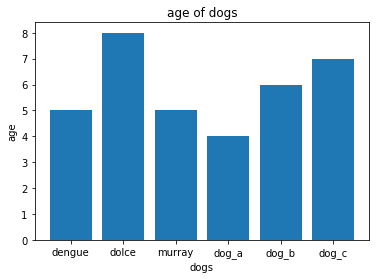

In [2]:
# an example of a bar plot 
ax = plt.subplot() # create an axis object, which the plot object which we can customize
our_dogs = ["dengue", "dolce", "murray", "dog_a", "dog_b", "dog_c"] 
dogs_age =  [5, 8, 5, 4, 6, 7]

plt.bar(range(len(our_dogs)), dogs_age)

ax.set_xticks(range(0,len(our_dogs))) # set ticks values, as a method of the axes
ax.set_xticklabels(our_dogs) # set tick labels, also as a method of the axes

plt.title('age of dogs')
plt.xlabel('dogs')
plt.ylabel('age')
plt.show()

[What is ax and figure?](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python)

Text(0.5, 1.0, 'cat age')

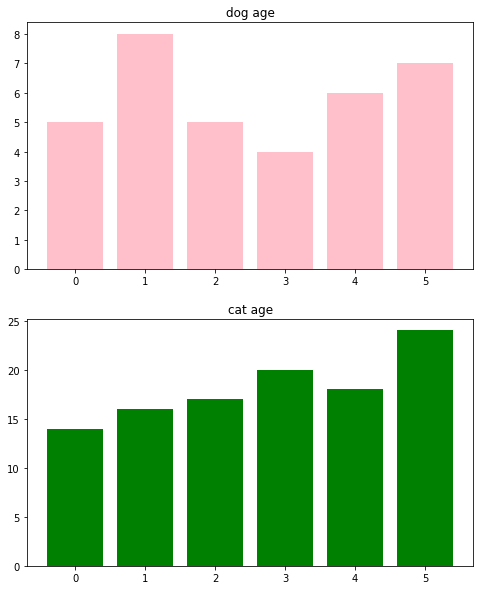

In [3]:
# utilizing the subplot function and creating subplots
our_cats = ["cat_1", "cat_2", "cat_3", "cat_4", "cat_5", "cat_6"]
cats_age =  [14, 16, 17, 20, 18, 24]
fig = plt.figure(figsize = (8,10))
ax1 = plt.subplot(2,1,1)
plt.bar(range(len(our_dogs)),dogs_age, color = 'pink')
plt.title('dog age')
plt.subplot(2,1,2)
plt.bar(range(len(our_cats)),cats_age, color = 'green')
plt.title('cat age')


What is something that you notice here that needs to be fixed?

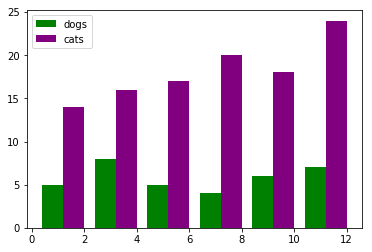

In [4]:
# we can create overlaid or side-by-side bargraph. You need to shift the x value by width to accommodate for two graphs.
from matplotlib import pyplot as plt
fig = plt.figure()
n = 1 # This is our first dataset (out of 2) 
t = 2 # Number of datasets 
d = 6 # Number of sets of bars 
w = 0.8 # Width of each bar 
dog_values = [t*element + w*n for element in range(d)] # essentially, this list comprehension gives us the position
# of the position of dogs
plt.bar(dog_values,dogs_age, color='green')
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
cat_values = [t*element + w*n for element in range(d)]
plt.bar(cat_values, cats_age, color = 'purple')
plt.legend(["dogs", "cats"])
n = 1

In [5]:
dog_values

[0.8, 2.8, 4.8, 6.8, 8.8, 10.8]

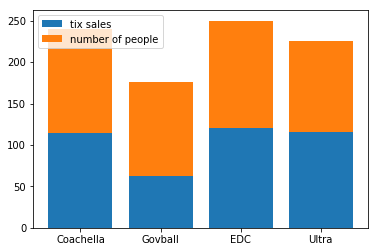

In [6]:
# stacked barplots 
ax = plt.subplot()
music_festivals = ["Coachella", "Govball", "EDC", "Ultra"]
ticket_sales_in_millon =  [114, 62, 120, 116]
people_attended_in_thousands = [126, 114 , 130, 110]

plt.bar(range(len(music_festivals)), ticket_sales_in_millon)
plt.bar(range(len(music_festivals)), people_attended_in_thousands, bottom=ticket_sales_in_millon)

plt.legend(["tix sales", "number of people"])
ax.set_xticks(range(0,len(music_festivals)))
ax.set_xticklabels(music_festivals)
plt.show()

### 2 Histogram
Histograms are like barplots in the sense that it describe __one-dimensional__ data. A histogram divides the variable into bins, counts the number of observations in each bin, and shows the bins on the x-axis and the frequency on the y-axis. It is used for visualizing __continuous__ variables. <br>

From the documentation: compute and draw the histogram of x. The return value is a tuple (__n, bins, patches__) or ([n0, n1, ...], bins, [patches0, patches1,...]) if the input contains multiple data.

Comparison of barplots and histogram
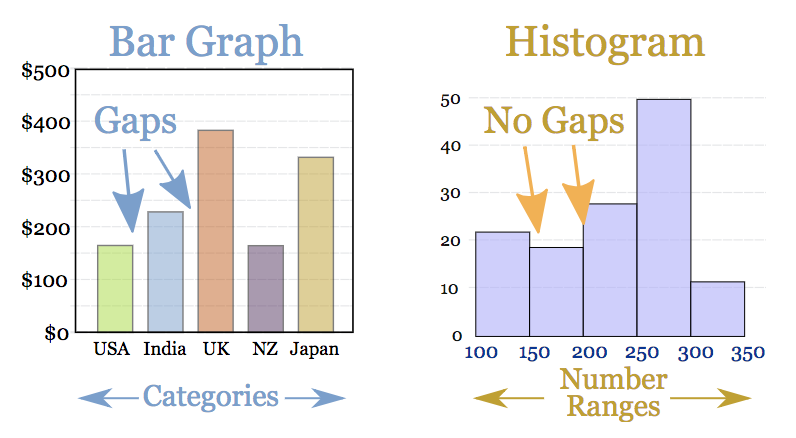

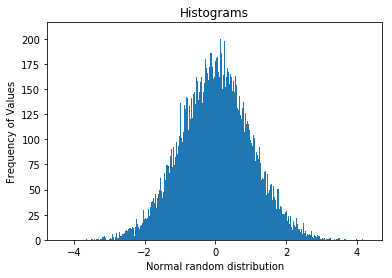

In [7]:
# Set seed for reproducability
np.random.seed(2018)

# Generate 1000 values from 0 standard normal distribution
x = np.random.randn(100000)

#Plot the distogram with hist() function
plt.hist(x, bins = 2000)

plt.xlabel('Normal random distribution')
plt.ylabel('Frequency of Values')
plt.title('Histograms')
plt.show()

(array([0.0309537 , 0.0309537 , 0.0309537 , 0.34049068, 0.58812027,
        0.71193507, 1.51673123, 2.53820328, 3.34299945, 4.05493452,
        3.46681424, 3.86921232, 3.49776794, 2.44534219, 1.91912931,
        1.20719425, 0.71193507, 0.46430548, 0.12381479, 0.0619074 ]),
 array([0.15455811, 0.18686442, 0.21917074, 0.25147706, 0.28378337,
        0.31608969, 0.34839601, 0.38070233, 0.41300864, 0.44531496,
        0.47762128, 0.50992759, 0.54223391, 0.57454023, 0.60684654,
        0.63915286, 0.67145918, 0.7037655 , 0.73607181, 0.76837813,
        0.80068445]),
 <a list of 20 Patch objects>)

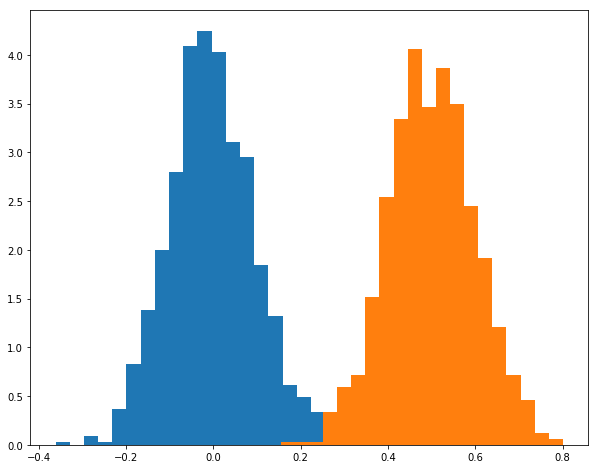

In [8]:
# overlaid histograms for two distributions
# plotting two histograms 
mu1, sigma1 = 0, 0.1 # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 1000)
mu2, sigma2 = 0.5, 0.1
s2 = np.random.normal(mu2, sigma2, 1000)
plt.figure(figsize = (10,8))
plt.hist(s1, bins = 20, density = True,)
plt.hist(s2, bins = 20, density = True,)

### 3. Scatterplot - visualizing two dimensional data
Scatterplots are usually used for visualizing two dimensional data (observations with two variables). It allows us to examine the relationship between two variables, thus it is sometimes called a correlation plot. 

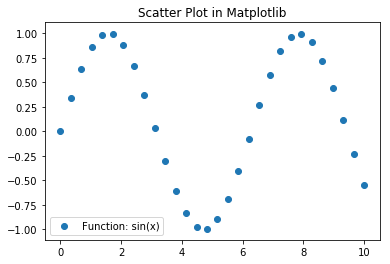

In [9]:
# generate some data -> the sine wave
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.scatter(x, y, label = "Function: sin(x)" )
plt.title('Scatter Plot in Matplotlib')
plt.legend()

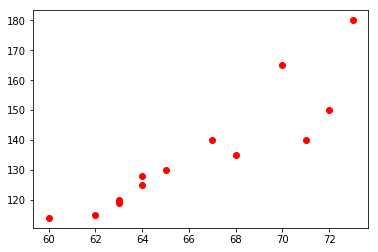

In [10]:
# examining correlation with height and weight 
height = [63,62,60,63,64,65,68,67,64,71,72,70,73]
weight = [120,115,114,119,125,130,135,140,128,140,150,165,180]
plt.scatter(height, weight,color = 'r')

Scatterplots, again, are great for examining the relationship between two variables. We can create pair-wise scatterplot for variables in a dataframe if we want to find their the correlations between variables. Later in this course, we will learn about correlation heatmap. 

### 3 - Pie Charts

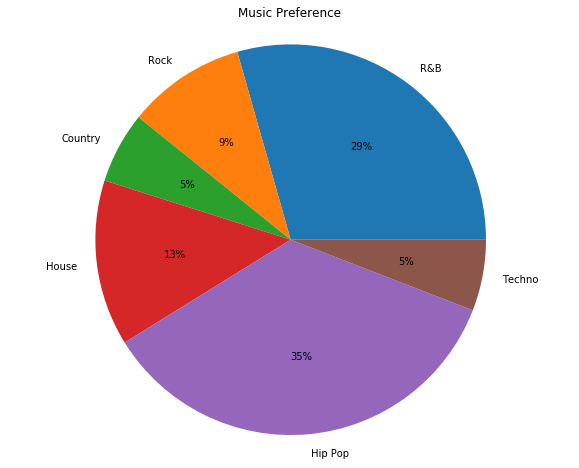

<Figure size 432x288 with 0 Axes>

In [11]:
# pie chart 
music_genre = ['R&B', 'Rock', 'Country', 'House', 'Hip Pop', 'Techno']
num_people_like = [15, 5, 3, 7, 18, 3]

#Make your plot here
plt.figure(figsize=(10,8))
plt.pie(num_people_like ,labels=music_genre, autopct="%1d%%")

plt.axis('equal')
plt.title('Music Preference')

plt.show()
plt.savefig("music_pie_chart.jpeg")
# saves the image to the directory

In [12]:
help(plt.axis)

Help on function axis in module matplotlib.pyplot:

axis(*v, **kwargs)
    Convenience method to get or set some axis properties.
    
    Call signatures::
    
      xmin, xmax, ymin, ymax = axis()
      xmin, xmax, ymin, ymax = axis(xmin, xmax, ymin, ymax)
      xmin, xmax, ymin, ymax = axis(option)
      xmin, xmax, ymin, ymax = axis(**kwargs)
    
    Parameters
    ----------
    xmin, ymin, xmax, ymax : float, optional
        The axis limits to be set. Either none or all of the limits must
        be given.
    
    option : str
        Possible values:
    
        ======== ==========================================================
        Value    Description
        ======== ==========================================================
        'on'     Turn on axis lines and labels.
        'off'    Turn off axis lines and labels.
        'equal'  Set equal scaling (i.e., make circles circular) by
                 changing axis limits.
        'scaled' Set equal scaling (i.e., 

## Part II - Visualizing with Seaborn
Seaborn is built on top of matplotlib and provides various aesthetic visualization types, such as violin plots, correlation heatmap and such. Let's focus on kde plots, distplot and boxplots for now.

### 1. kde (kernel density estimation) plots

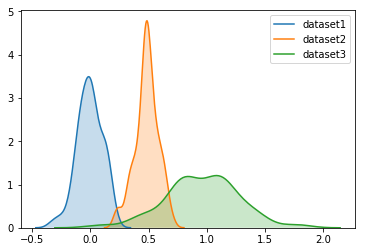

In [13]:
import seaborn as sns
mu1, sigma1 = 0, 0.1 # mean and standard deviation
s1 = list(np.random.normal(mu1, sigma1, 100))
mu2, sigma2 = 0.5, 0.1
s2 = list(np.random.normal(mu2, sigma2, 100))
mu3, sigma3 = 1, 0.3
s3 = list(np.random.normal(mu3, sigma3, 100))
sns.kdeplot(s1, shade=True, label="dataset1")
sns.kdeplot(s2, shade=True, label="dataset2")
sns.kdeplot(s3, shade=True, label="dataset3")

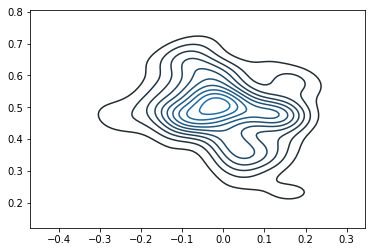

In [14]:
# If we pass a two dimensional dataset to the kde plot function, we will get a two dimensional rendition 
sns.kdeplot(s1,s2)

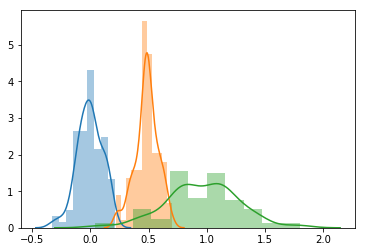

In [15]:
sns.distplot(s1)
sns.distplot(s2)
sns.distplot(s3)

### 2. Boxplots
Boxplots are a very informative type of visualization tool because it allows us to know the distribution of the data. 
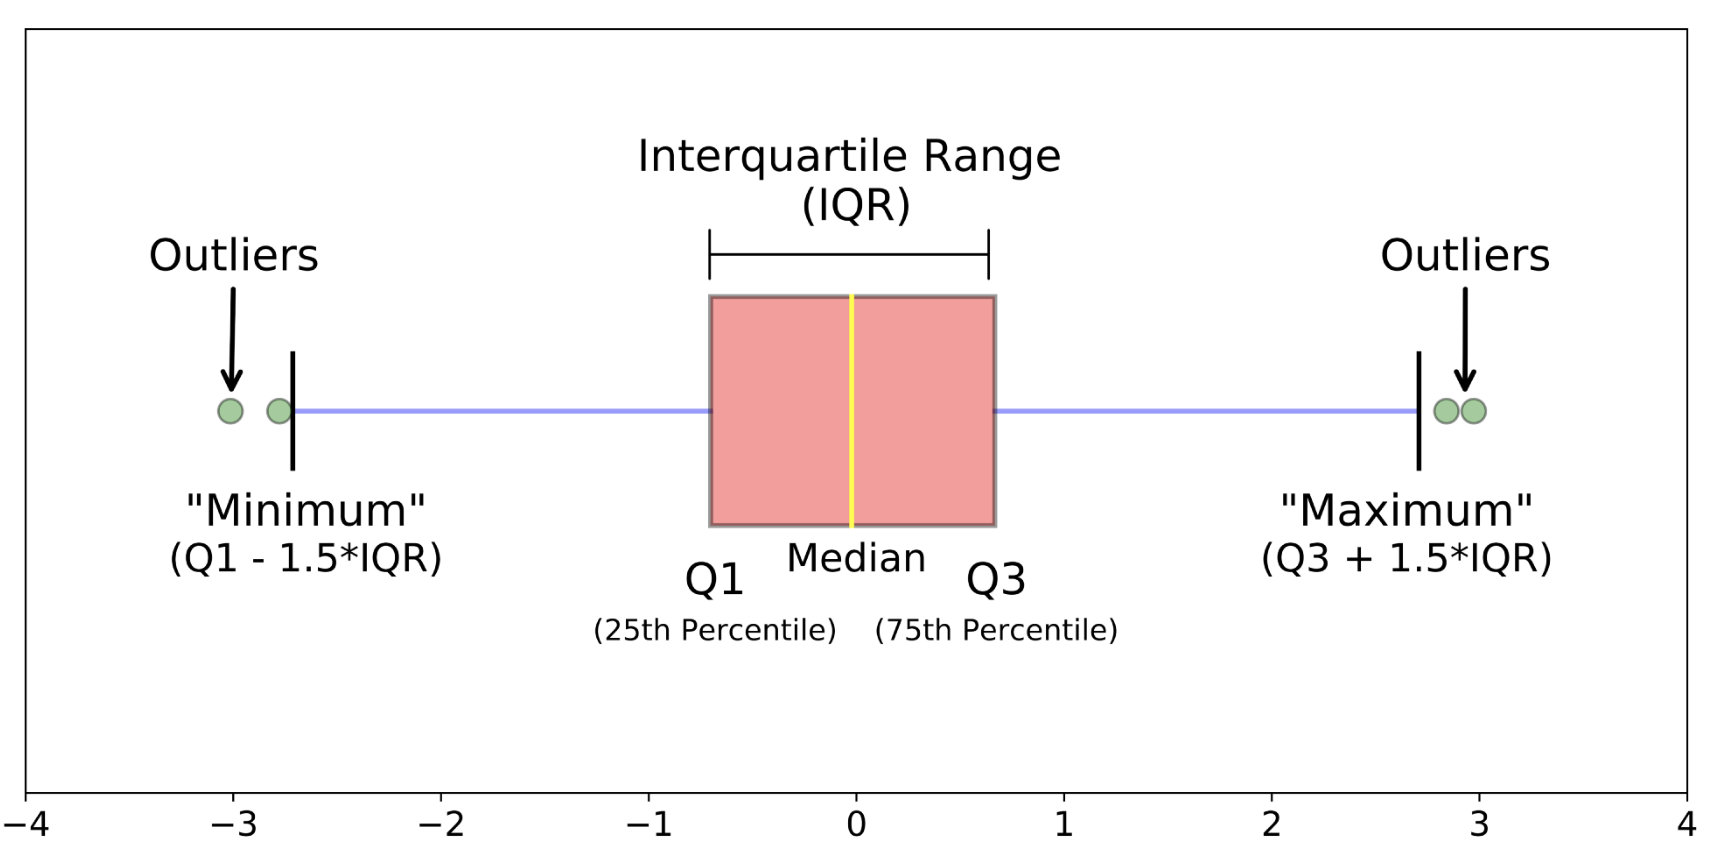

In [16]:
iris = sns.load_dataset('iris')
iris.columns
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 1.0, 'sepal length for different types of iris')

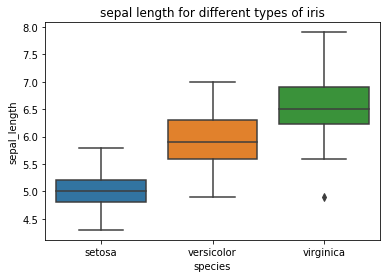

In [17]:
sns.boxplot(x = iris['species'], y = iris['sepal_length'])
plt.title('sepal length for different types of iris')

In [18]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 3. Other visualization - advanced 

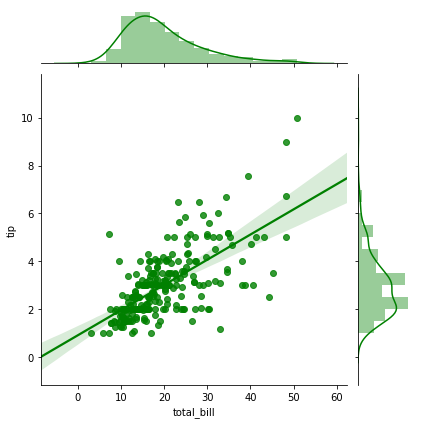

In [19]:
sns.jointplot(x = tips['total_bill'], y = tips['tip'], kind = 'reg',color = 'green')

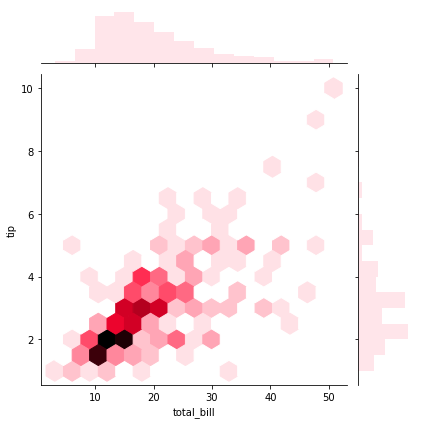

In [20]:
sns.jointplot(x = tips['total_bill'], y = tips['tip'], kind = 'hex', color = 'pink')

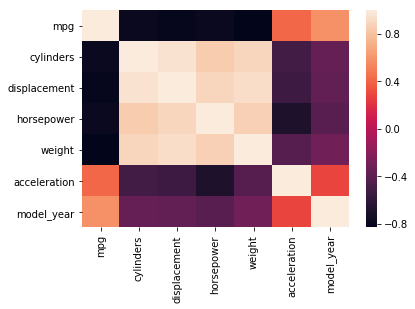

In [21]:
# correlational heatmap 
mpg = sns.load_dataset('mpg')
sns.heatmap(mpg.corr(),color = 'blue')

In [22]:
mpg.corr()
# computes the correlations between each pair of variables 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [23]:
import math
math.factorial(4)

24